In [ ]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
import re
import codecs
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import torch
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from wordcloud import WordCloud
from sklearn import svm

In [2]:
df = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")
df=df[['company_description','company_industry']]

/home/slintel/bert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def get_these_industires(df,indsutries,col_name):
    filtered_data=pd.DataFrame()
    for i in indsutries:
        temp=df.loc[(df[col_name]==i)]
        filtered_data=filtered_data.append(temp)
    filtered_data.reset_index(inplace=True,drop=True)
    return filtered_data

In [4]:
industries=['Food & Beverages','Music',
            'Sports','Oil & Energy',
            'Apparel & Fashion','Insurance','Mining & Metals',
            'Architecture & Planning','Aviation & Aerospace','Environmental Services']

In [5]:
df=get_these_industires(df,industries,'company_industry')

In [6]:
df['company_industry'].value_counts()

Food & Beverages           6270
Insurance                  6230
Oil & Energy               5646
Apparel & Fashion          4692
Environmental Services     3271
Sports                     3050
Mining & Metals            2797
Architecture & Planning    2480
Aviation & Aerospace       2402
Music                      2175
Name: company_industry, dtype: int64

In [7]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", str(elem)))
    return df

data_clean = clean_text(df, 'company_description', 'text_clean')
data_clean['company_description'] = data_clean['text_clean']
df = data_clean[['company_description','company_industry']]

In [8]:
df

,company_description,company_industry
0,saffron fix is the only indian mealkit deliver...,Food & Beverages
1,the streats was launched in august of the ide...,Food & Beverages
2,vil du jobbe med kremen av iskremnoen morgener...,Food & Beverages
3,slo un caf lleva la firma de juan valdezjuan v...,Food & Beverages
4,a beer for the gold thirsty us at habesha have...,Food & Beverages
...,...,...
39008,sintecsys has designed a solution to detect fi...,Environmental Services
39009,sintef norlab er det norges strste norskeide l...,Environmental Services
39010,unique properties of the triad is an environme...,Environmental Services
39011,smartcover is a pioneering technology provider...,Environmental Services


In [9]:
def get_word_cloud(df, company_industry_name):
    temp = df.loc[df.company_industry==company_industry_name]
    text2 = " ".join(i for i in temp.company_description)
    # Creating word_cloud with text as argument in .generate() method
    word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
    word_cloud2.to_file("saved_images/"+company_industry_name+".png")
    plt.figure(figsize=[10,10])
    # Display the generated Word Cloud
    print('***** '+company_industry_name+' *****')
    plt.imshow(word_cloud2, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return 0

***** Food & Beverages *****


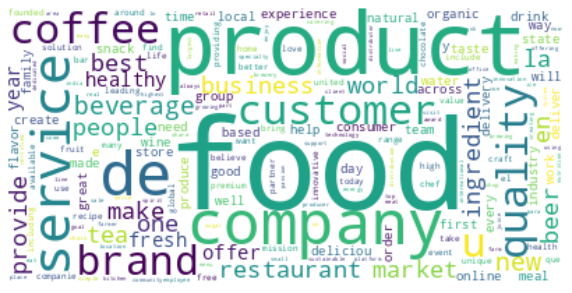

***** Music *****


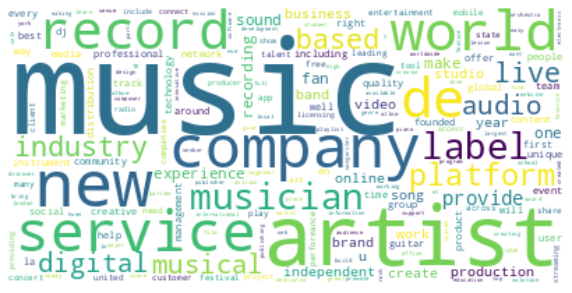

***** Sports *****


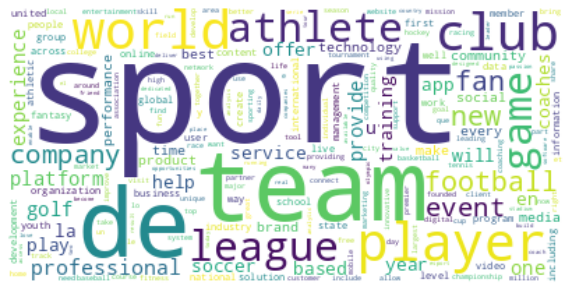

***** Oil & Energy *****


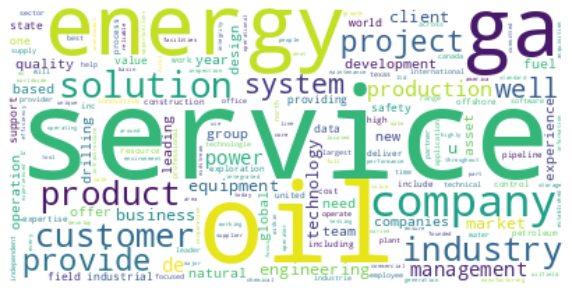

***** Apparel & Fashion *****


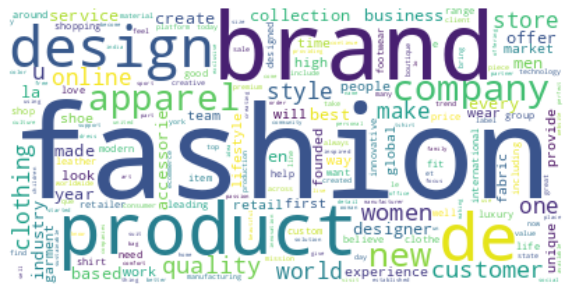

***** Insurance *****


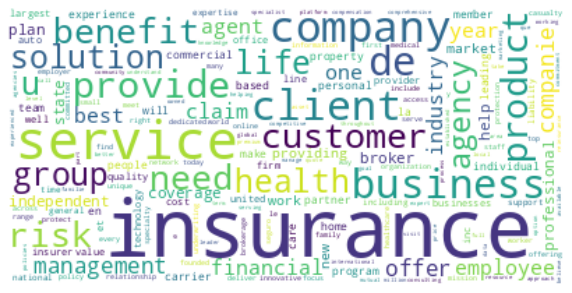

***** Mining & Metals *****


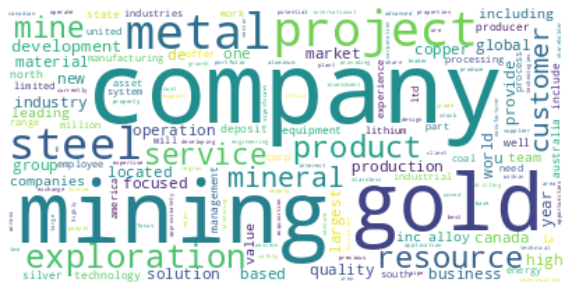

***** Architecture & Planning *****


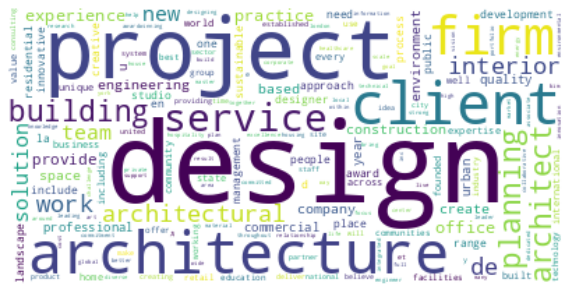

***** Aviation & Aerospace *****


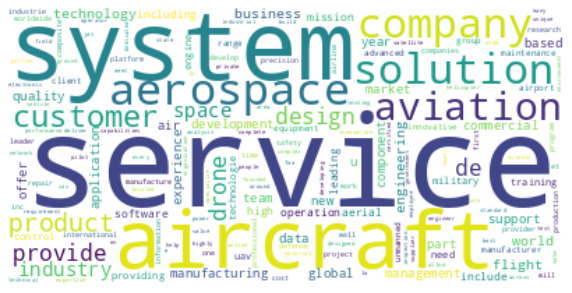

***** Environmental Services *****


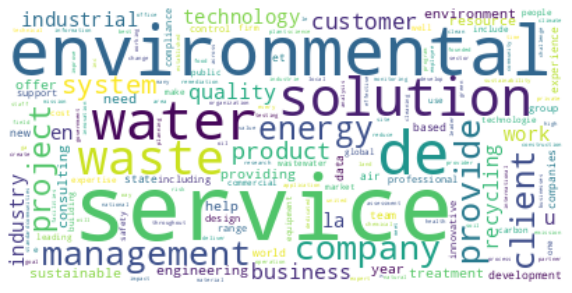

In [10]:
for i in industries:
    get_word_cloud(df,i)

In [11]:
df['category_id'] = df['company_industry'].factorize()[0]

In [12]:
df

,company_description,company_industry,category_id
0,saffron fix is the only indian mealkit deliver...,Food & Beverages,0
1,the streats was launched in august of the ide...,Food & Beverages,0
2,vil du jobbe med kremen av iskremnoen morgener...,Food & Beverages,0
3,slo un caf lleva la firma de juan valdezjuan v...,Food & Beverages,0
4,a beer for the gold thirsty us at habesha have...,Food & Beverages,0
...,...,...,...
39008,sintecsys has designed a solution to detect fi...,Environmental Services,9
39009,sintef norlab er det norges strste norskeide l...,Environmental Services,9
39010,unique properties of the triad is an environme...,Environmental Services,9
39011,smartcover is a pioneering technology provider...,Environmental Services,9


In [13]:
X_train, X_val, y_train, y_val = train_test_split(df.company_description, 
                                                  df.category_id, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.category_id)

In [14]:
'''RUN THIS if new data OR for first time'''

from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('stsb-roberta-large') #RoBERTa, an optimized version of BERT by Facebook.

# vectorize the data
%timeit X_train_vec = pd.DataFrame(np.vstack(X_train.apply(bert.encode)))
X_test_vec = pd.DataFrame(np.vstack(X_val.apply(bert.encode)))

X_train_vec.to_csv('../data/TEMP_bert_encoded_train_10_Classes.csv',index=False)
X_test_vec.to_csv('../data/TEMP_bert_encoded_test_10_Classes.csv',index=False)
y_train.to_csv('../data/TEMP_for_bert_emb_Y_train_10_Classes.csv',index=False)
y_val.to_csv('../data/TEMP_for_bert_emb_Y_val_10_Classes.csv',index=False)

In [ ]:
# '''Run this Cell is Already encoded text is saved'''
# X_train_vec=pd.read_csv('../data/TEMP_bert_encoded_train_5_Classes.csv')
# X_test_vec=pd.read_csv('../data/TEMP_bert_encoded_test_5_Classes.csv')
# y_train=pd.read_csv('../data/TEMP_for_bert_emb_Y_train_5_Classes.csv')
# y_val=pd.read_csv('../data/TEMP_for_bert_emb_Y_val_5_Classes.csv')

# #dropping index column which got added while saving
# X_train_vec=X_train_vec.iloc[:,1:]
# X_test_vec=X_test_vec.iloc[:,1:]
# y_train=y_train.iloc[:,1:]
# y_val=y_val.iloc[:,1:]

# #converting to single dimension
# y_train=y_train.values.ravel()
# y_val=y_val.values.ravel()
# y_test=y_val

/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


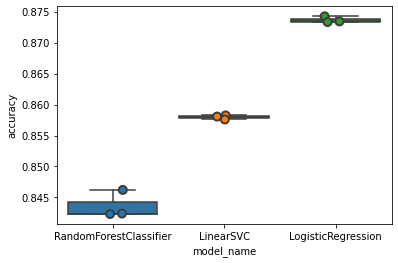

In [16]:
models = [
    RandomForestClassifier(n_estimators=800,random_state=0,n_jobs=-1),
    LinearSVC(),
    LogisticRegression(random_state=0,n_jobs=-1),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_vec, y_train, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
# BERT doesn't have feature names, 
#use your classifier

model = RandomForestClassifier(n_estimators=800, n_jobs=-1,verbose=1)
model.fit(X_train_vec, y_train)

In [ ]:
model.score(X_test_vec, y_val)

In [ ]:
y_pred = model.predict(X_test_vec)
print(metrics.classification_report(y_val, y_pred))

In [ ]:
model = LinearSVC()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [ ]:
model.score(X_test_vec, y_val)

In [17]:
LR_model = LogisticRegression(n_jobs=-1,verbose=True)
classifier=LR_model.fit(X_train_vec, y_train)
y_pred = LR_model.predict(X_test_vec)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   44.4s finished


In [18]:
acc_score = LR_model.score(X_test_vec, y_val)
print(acc_score)

0.8870471633629529


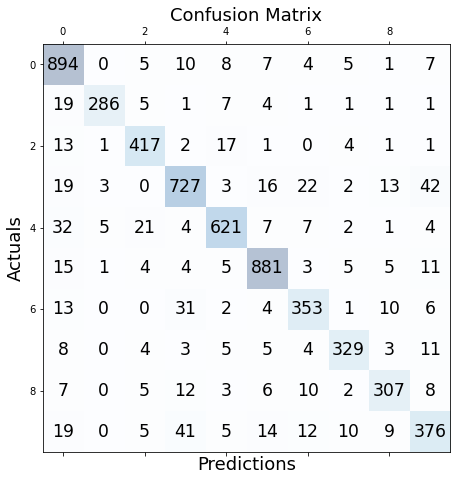

In [20]:
y_test=y_val
'''VERY SLOW'''
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=df.company_industry.values, yticklabels=df.company_industry.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

'''FAST PLOT'''

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['company_industry'].unique()))

                         precision    recall  f1-score   support

       Food & Beverages       0.86      0.95      0.90       941
                  Music       0.97      0.88      0.92       326
                 Sports       0.89      0.91      0.90       457
           Oil & Energy       0.87      0.86      0.86       847
      Apparel & Fashion       0.92      0.88      0.90       704
              Insurance       0.93      0.94      0.94       934
        Mining & Metals       0.85      0.84      0.84       420
Architecture & Planning       0.91      0.88      0.90       372
   Aviation & Aerospace       0.87      0.85      0.86       360
 Environmental Services       0.81      0.77      0.78       491

               accuracy                           0.89      5852
              macro avg       0.89      0.88      0.88      5852
           weighted avg       0.89      0.89      0.89      5852



In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
random_state=42

In [25]:
X=df['company_description']
y=df['category_id']

# Use label_binarize to be multi-label like settings
     
Y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]
    
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15,
                                                    random_state=42,
                                                    stratify=df.category_id)
X_train=X_train_vec
X_test=X_test_vec
# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state),n_jobs=-1)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [26]:
classifier.score(X_test, Y_test)

0.8779904306220095

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes=Y.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.94


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.94')

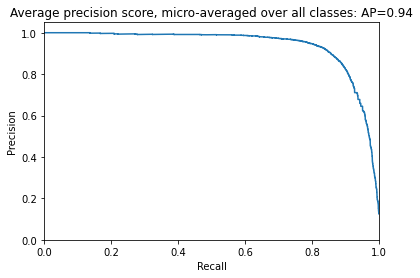

In [28]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

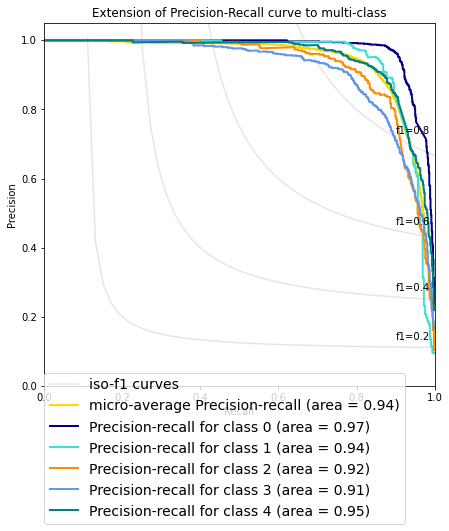

In [29]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [32]:
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


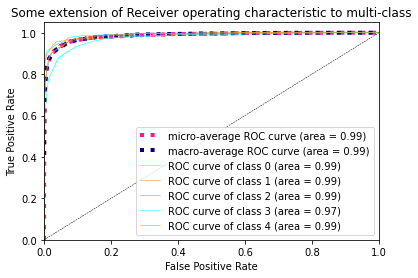

In [39]:
lw=0.5
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()